<a id='table_of_contents'></a>

# Table of Contents
0. [Import Libraries and Data](#imports) 
1. [Data Exploration](#data_exploration)  
1. [Movies vs TV Shows](#comparsion) 

<a id='imports'></a>
# Import Libraries and Data
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# Data Exploration
[Back to top](#table_of_contents)

In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7993,s7994,TV Show,Shaka Zulu,NaN,"Edward Fox, Robert Powell, Trevor Howard, Fion...","Italy, South Africa, West Germany, Australia, ...","January 10, 2019",1986,TV-14,1 Season,TV Dramas,This miniseries recounts the early 19th-centur...
4487,s4488,TV Show,Accidentally in Love,NaN,"Junchen Guo, Yi Ning Sun, Yi Qin Zhao, Mu Xuan...",China,"October 19, 2018",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Rejecting the demands of her wealthy family, a..."
4628,s4629,TV Show,DRAGON PILOT: Hisone & Masotan,NaN,"Misaki Kuno, Tomoyo Kurosawa, Maki Kawase, Sat...",Japan,"September 21, 2018",2018,TV-14,1 Season,"Anime Series, International TV Shows",Recently stationed Air Self-Defense Force rook...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
2568,s2569,TV Show,Hangar 1: The UFO Files,NaN,NaN,NaN,"May 2, 2020",2015,TV-PG,1 Season,Docuseries,Researchers add context and clarity to UFO mys...


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='comparsion'></a>
# Movies vs TV Shows
[Back to top](#table_of_contents)

In [8]:
type_counts = netflix_df['type'].value_counts()
type_counts

Movie      6131
TV Show    2676
Name: type, dtype: int64

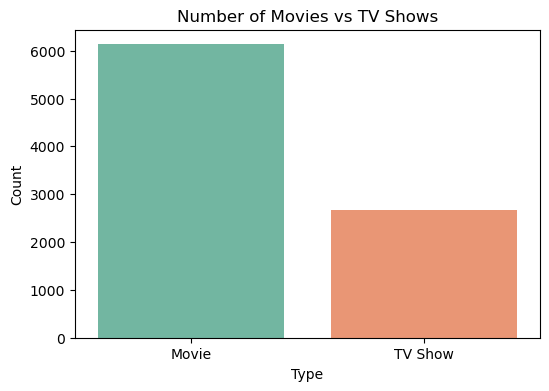

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

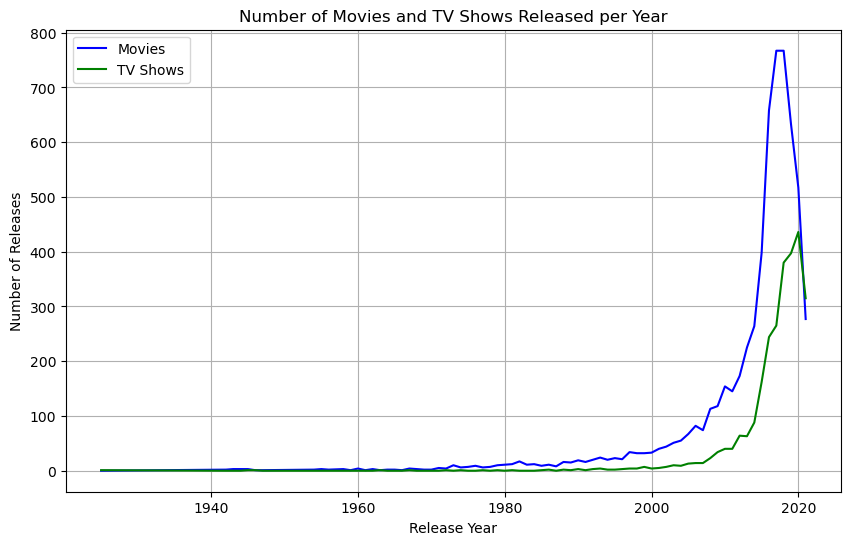

In [27]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='blue', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='green', label='TV Shows')

plt.title('Number of Movies and TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()



In [57]:
movies = netflix_df[netflix_df["type"]=="Movie"] 
tv_shows = netflix_df[netflix_df["type"]=="TV Show"]

In [63]:
movie_genres = movies['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_show_genres = tv_shows['listed_in'].str.split(', ').explode().value_counts().head(10)

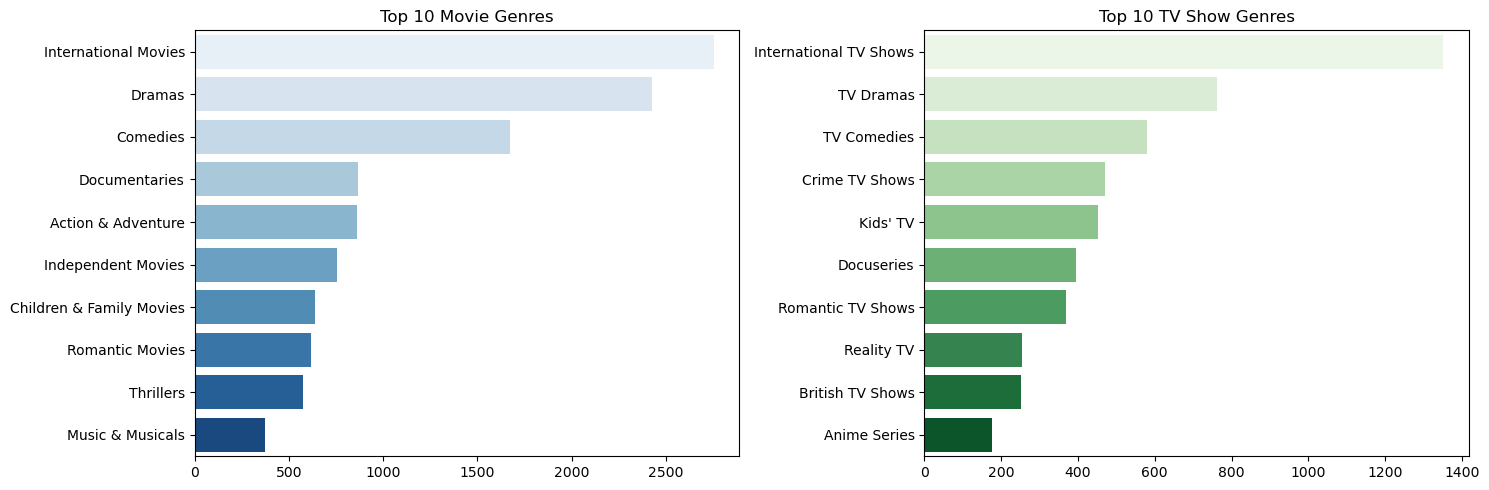

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=movie_genres.values, y=movie_genres.index, ax=ax[0], palette='Blues')
ax[0].set_title('Top 10 Movie Genres')
sns.barplot(x=tv_show_genres.values, y=tv_show_genres.index, ax=ax[1], palette='Greens')
ax[1].set_title('Top 10 TV Show Genres')

plt.tight_layout()
plt.show()

In [78]:
movie_country = movies['country'].str.split(', ').explode().value_counts().head(10)
tv_show_country = tv_shows['country'].str.split(', ').explode().value_counts().head(10)

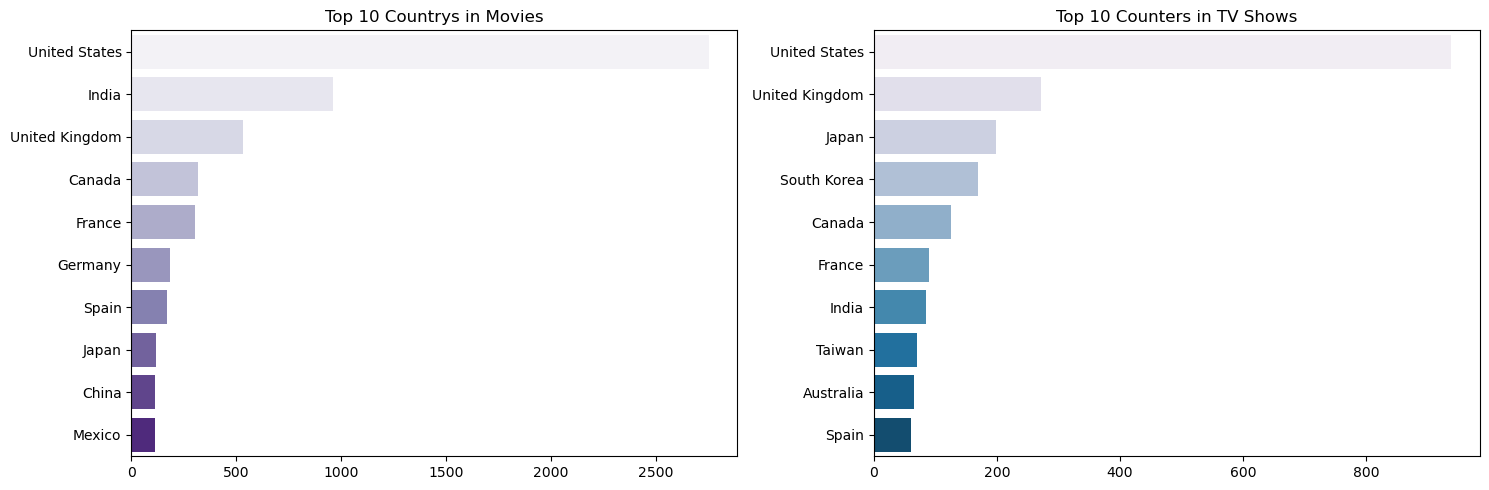

In [82]:
fig , ax = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x=movie_country.values,y=movie_country.index, ax=ax[0],palette='Purples')
ax[0].set_title('Top 10 Countrys in Movies')
sns.barplot(x=tv_show_country.values,y=tv_show_country.index,ax=ax[1],palette='PuBu')
ax[1].set_title('Top 10 Counters in TV Shows')

plt.tight_layout()
plt.show()